#Step 0: Imports and Seed Setup

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
SEED = 181
tf.random.set_seed(SEED)
np.random.seed(SEED)


#Step 1: Load the MNIST Dataset

In [3]:
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


#Step 2: Print the number of images in train and test sets

In [4]:
print(f"Number of training images: {x_train.shape[0]}")
print(f"Number of test images: {x_test.shape[0]}")

Number of training images: 60000
Number of test images: 10000


#Step 3: Print first 5 images in the train set along with their corresponding number

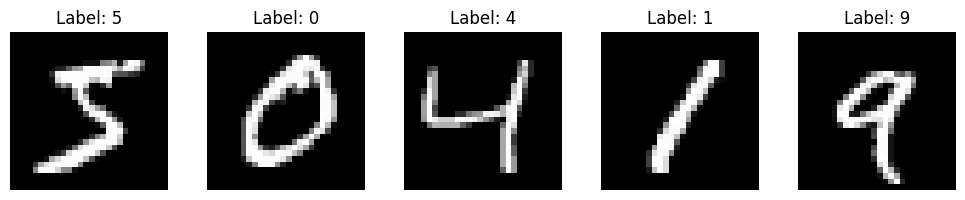

In [5]:
plt.figure(figsize=(10, 2))

for i in range(5):
    plt.subplot(1, 5, i+1)  # create a 1 x 5 grid of subplots
    plt.imshow(x_train[i], cmap='gray')  # show in grayscale
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


#Step 4: Reshape the images to include the channel dimension

In [6]:
# Since the images are 28x28 in grayscale, we add 1 channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test  = x_test.reshape((x_test.shape[0], 28, 28, 1))
print("New shape of x_train:", x_train.shape)
print("New shape of x_test:", x_test.shape)

New shape of x_train: (60000, 28, 28, 1)
New shape of x_test: (10000, 28, 28, 1)


#Step 5: Normalize the images

In [7]:
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

#Step 6: Apply one-hot encoding on the y values

In [8]:
from tensorflow.keras.utils import to_categorical

# Keep a copy of the old labels for printing purposes
y_train_old = y_train.copy()
y_test_old  = y_test.copy()

# Convert numeric labels to one-hot vectors
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)


#Step 7: Print old and new values for the first 5 instances of y_train

In [9]:
print("Old y_train labels (first 5):", y_train_old[:5])
print("New (one-hot) y_train labels (first 5):")
for i in range(5):
    print(y_train[i])

Old y_train labels (first 5): [5 0 4 1 9]
New (one-hot) y_train labels (first 5):
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#Step 8: Build the CNN Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

# Convolution Layer 1
model.add(Conv2D(
    filters=32,              # Number of filters
    kernel_size=(3, 3),      # Filter size (height, width)
    strides=(1, 1),          # Step size the filter moves
    padding='valid',         # 'valid' means no padding, 'same' pads so output size matches input
    activation='relu',
    input_shape=(28, 28, 1)  # Input dimension: 28x28x1
))

# Max Pooling Layer 1
model.add(MaxPooling2D(
    pool_size=(2, 2),        # Size of the max pooling windows
    strides=(2, 2)           # How far the pooling window moves each time
))

# Dropout Layer
model.add(Dropout(0.25))     # 25% of the nodes are randomly "dropped" to prevent overfitting

# Convolution Layer 2
model.add(Conv2D(
    filters=64,
    kernel_size=(3, 3),
    activation='relu',
    padding='valid'
))

# Max Pooling Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))     # Another dropout to reduce overfitting

# Flatten Layer
model.add(Flatten())         # Flattens the 2D feature maps into a single 1D vector

# Dense (Fully Connected) Layer
model.add(Dense(
    units=128,               # Number of neurons
    activation='relu'
))
model.add(Dropout(0.5))      # Dropout with 50% for further regularization

# Final Output Layer
model.add(Dense(
    units=10,                # 10 classes for digits 0-9
    activation='softmax'     # Softmax outputs a probability distribution across 10 classes
))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Step 9: Compile the model

In [11]:
model.compile(
    optimizer='adam',              # Adam is a popular choice for faster convergence
    loss='categorical_crossentropy', # For multi-class classification
    metrics=['accuracy']
)

#Step 10: Print the model summary

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

#Step 11: Fit the model

In [13]:
history = model.fit(
    x_train,       # Training images
    y_train,       # Training labels (one-hot)
    batch_size=128,    # Number of samples per gradient update
    epochs=10,         # Number of passes through the full training dataset
    validation_data=(x_test, y_test)  # Validation set to check performance each epoch
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 118ms/step - accuracy: 0.7622 - loss: 0.7316 - val_accuracy: 0.9772 - val_loss: 0.0728
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 114ms/step - accuracy: 0.9604 - loss: 0.1346 - val_accuracy: 0.9858 - val_loss: 0.0440
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 114ms/step - accuracy: 0.9702 - loss: 0.0983 - val_accuracy: 0.9883 - val_loss: 0.0363
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 112ms/step - accuracy: 0.9765 - loss: 0.0776 - val_accuracy: 0.9883 - val_loss: 0.0342
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - accuracy: 0.9791 - loss: 0.0701 - val_accuracy: 0.9891 - val_loss: 0.0296
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 112ms/step - accuracy: 0.9820 - loss: 0.0619 - val_accuracy: 0.9907 - val_loss: 0.0276
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 110ms/step - accuracy: 0.9832 - loss: 0.0574 - val_accuracy: 0.9906 - val_loss: 0.0287
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 108ms/step - accuracy: 0.9835 - loss: 0

#Step 12: Predict on the test data

In [14]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


#Step 13: Print the accuracy of the model

In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Test accuracy: 99.19%


#Step 14: For each row, find the index of the highest probability

In [16]:
# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)  # highest probability index
actual_labels = np.argmax(y_test, axis=1)          # actual test labels (one-hot -> index)

#Step 15: Print results for the first 20 instances

In [18]:
print("First 20 predictions vs actual (tabular format):")

# Print header row with aligned columns
print("{:<7} | {:<18} | {:<15} | {:<12}".format(
    "Sample", "Highest Probability", "Predicted Digit", "Actual Digit"
))
print("-"*60)

# Print each row
for i in range(20):
    probs = predictions[i]
    highest_prob = np.max(probs)
    predicted_digit = predicted_labels[i]
    actual_digit = actual_labels[i]

    print("{:<7} | {:<18.6f} | {:<15d} | {:<12d}".format(
        i, highest_prob, predicted_digit, actual_digit
    ))

First 20 predictions vs actual (tabular format):
Sample  | Highest Probability | Predicted Digit | Actual Digit
------------------------------------------------------------
0       | 1.000000           | 7               | 7           
1       | 1.000000           | 2               | 2           
2       | 0.999995           | 1               | 1           
3       | 0.999997           | 0               | 0           
4       | 0.999999           | 4               | 4           
5       | 0.999999           | 1               | 1           
6       | 0.999907           | 4               | 4           
7       | 0.998195           | 9               | 9           
8       | 0.998548           | 5               | 5           
9       | 0.999491           | 9               | 9           
10      | 1.000000           | 0               | 0           
11      | 0.999999           | 6               | 6           
12      | 0.999696           | 9               | 9           
13      | 1.000000   

#Step 16: Print results for all misclassified instances

In [21]:
print("Misclassified samples (tabular format):")

# Print header row with aligned columns
print("{:<12} | {:<18} | {:<15} | {:<12}".format(
    "Sample", "Highest Probability", "Predicted Digit", "Actual Digit"
))
print("-" * 60)

# Print each misclassified instance in a row
misclassified_indices = np.where(predicted_labels != actual_labels)[0]
for i in misclassified_indices:
    probs = predictions[i]
    highest_prob = np.max(probs)
    predicted_digit = predicted_labels[i]
    actual_digit = actual_labels[i]

    print("{:<12d} | {:<18.6f} | {:<15d} | {:<12d}".format(
        i, highest_prob, predicted_digit, actual_digit
    ))

Misclassified samples (tabular format):
Sample       | Highest Probability | Predicted Digit | Actual Digit
------------------------------------------------------------
259          | 0.521052           | 0               | 6           
321          | 0.878033           | 7               | 2           
340          | 0.682018           | 3               | 5           
359          | 0.692607           | 4               | 9           
495          | 0.514507           | 0               | 8           
582          | 0.864467           | 2               | 8           
659          | 0.493072           | 7               | 2           
938          | 0.636697           | 5               | 3           
947          | 0.711178           | 9               | 8           
1014         | 0.991271           | 5               | 6           
1033         | 0.647301           | 1               | 8           
1112         | 0.580794           | 6               | 4           
1114         | 0.715573    